_______________
<center>
  <h1 style="font-size: 40px; font-weight: bold">PRODIGY INTERNSHIP</h1>
</center>

______

<center>
  <h1 style="font-size: 30px; font-weight: bold">TASK 4: SENTIMENT ANALYSIS
</h1>
</center>


* **Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

**Intern: Aswathy S**

**Track: Data Science**

**Task Code: PRODIGY_DS_04**
_________

___________
# **LOADING LIBRARIES**
_______

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

___________
# **LOADING DATASET**
___________

In [2]:
# Load the training and validation datasets
train_path = r'C:\Users\admin\Downloads\twitter_training.csv/twitter_training.csv'
validation_path = r'C:\Users\admin\Downloads/twitter_validation.csv'

In [3]:
# Read CSV files (no headers in these files)
df_train = pd.read_csv(train_path, header=None)
df_validation = pd.read_csv(validation_path, header=None)

In [4]:
# Concatenate both datasets
df_combined = pd.concat([df_train, df_validation], ignore_index=True)
df_combined

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
# Drop rows where the tweet text is missing (column index 3)
df = df_combined.dropna(subset=[3])

In [6]:
# Rename columns for clarity
df.columns = ['Tweet_ID', 'Topic', 'Sentiment', 'Tweet']

In [7]:
df

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df.shape

(74996, 4)

In [9]:
df.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
df.tail()

,Tweet_ID,Topic,Sentiment,Tweet
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
75681,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [11]:
df.columns

Index(['Tweet_ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   74996 non-null  int64 
 1   Topic      74996 non-null  object
 2   Sentiment  74996 non-null  object
 3   Tweet      74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


__________
# **DATA PREPROCESSING**
_______

In [13]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Tweet_ID     0
Topic        0
Sentiment    0
Tweet        0
dtype: int64


In [14]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
2857


In [15]:
df[df['Tweet'].duplicated(keep=False)]

,Tweet_ID,Topic,Sentiment,Tweet
11,2402,Borderlands,Positive,was
18,2404,Borderlands,Positive,that was the first borderlands session in a lo...
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
...,...,...,...,...
75675,314,Amazon,Negative,Please explain how this is possible! How can t...
75676,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
# Remove exact duplicate rows (all columns)
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)

New shape after removing duplicates: (72139, 4)


In [17]:
df.shape

(72139, 4)

In [18]:
df['Sentiment'].value_counts()

Sentiment
Negative      21790
Positive      19846
Neutral       17879
Irrelevant    12624
Name: count, dtype: int64

In [19]:
df['Topic'].value_counts()

Topic
TomClancysRainbowSix                 2349
CallOfDuty                           2333
Verizon                              2330
MaddenNFL                            2326
Microsoft                            2317
WorldOfCraft                         2317
LeagueOfLegends                      2314
TomClancysGhostRecon                 2305
ApexLegends                          2305
NBA2K                                2304
Facebook                             2300
johnson&johnson                      2274
Amazon                               2270
Battlefield                          2269
CallOfDutyBlackopsColdWar            2256
FIFA                                 2256
Dota2                                2240
Hearthstone                          2237
Overwatch                            2231
Borderlands                          2222
HomeDepot                            2221
GrandTheftAuto(GTA)                  2218
Xbox(Xseries)                        2216
Nvidia                      

_________
## **Visualization of Sentiment Distribution**
____________

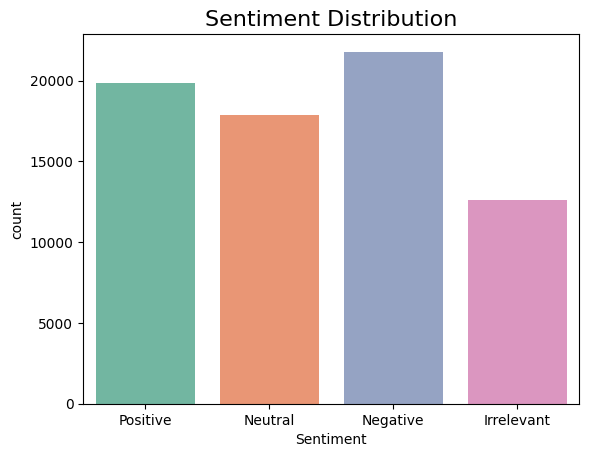

In [20]:
# plot
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution', fontsize=16)
plt.show()

______
## **TEXT CLEANING:** 
_______

### 1. Punctuation Removal:
__________

In [21]:
import string

# Remove punctuation
df['Tweet'] = df['Tweet'].str.replace(f"[{re.escape(string.punctuation)}]", "", regex=True)
df['Sentiment'] = df['Sentiment'].str.replace(f"[{re.escape(string.punctuation)}]", "", regex=True)

In [22]:
# Check Comments having any upper case letters
df[df['Tweet'].str.contains(r'[A-Z]')]

,Tweet_ID,Topic,Sentiment,Tweet
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...
...,...,...,...,...
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
75673,2165,CallOfDuty,Neutral,Late night stream with the boys Come watch som...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


________
### 2. Convert to lowercase:
_________

In [23]:
# Convert the 'Tweet' column to lowercase safely

df['Tweet'] = df['Tweet'].str.lower()
print("Text cleaned: Converted 'Tweet' to lowercase.")
print("Lowercase conversion completed!")

Text cleaned: Converted 'Tweet' to lowercase.
Lowercase conversion completed!


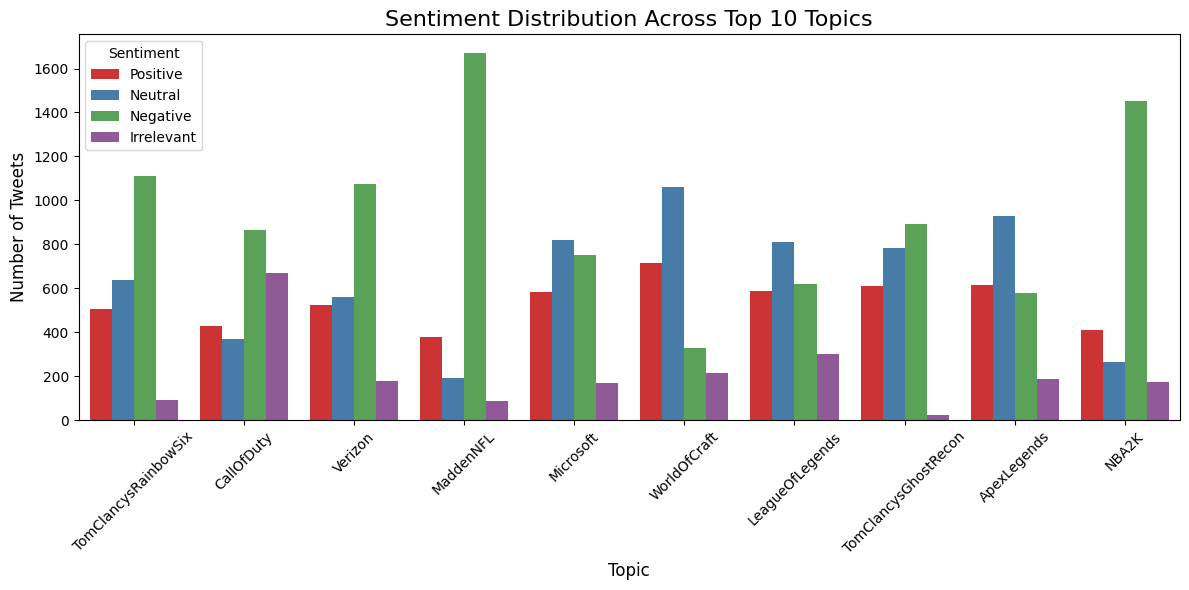

In [24]:
# plot
plt.figure(figsize=(12, 6))

# a count plot of Sentiment by Topic (showing top 10 topics)
sns.countplot(
    data=df,
    x='Topic',
    hue='Sentiment', 
    order=df['Topic'].value_counts().index[:10],
    palette='Set1'
)
plt.title('Sentiment Distribution Across Top 10 Topics', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

___________
## **TOKENIZATION:**
_________

### 1. Word tokenize:
____________

In [25]:
from nltk.tokenize import word_tokenize
import nltk

In [26]:
# Tokenize
df['Cleaned_Tweet'] = df['Tweet'].apply(word_tokenize)

print("Tokenization completed!")
df[['Tweet', 'Cleaned_Tweet']].head()

Tokenization completed!


,Tweet,Cleaned_Tweet
0,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will..."


_______
## Stopword Removal
__________

In [27]:
from nltk.corpus import stopwords

In [28]:
stop_words = set(stopwords.words('english') + ['im', 'ive', 'also'])

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(remove_stopwords)

print("Text preprocessing completed!")

Text preprocessing completed!


In [29]:
# Print the first few rows to check
df[['Tweet', 'Cleaned_Tweet', ]].head()

,Tweet,Cleaned_Tweet
0,im getting on borderlands and i will murder yo...,"[getting, borderlands, murder]"
1,i am coming to the borders and i will kill you...,"[coming, borders, kill]"
2,im getting on borderlands and i will kill you all,"[getting, borderlands, kill]"
3,im coming on borderlands and i will murder you...,"[coming, borderlands, murder]"
4,im getting on borderlands 2 and i will murder ...,"[getting, borderlands, 2, murder]"


___________
## Word Cloud for Cleaned Tweets
___________

In [30]:
# Convert token lists into joined strings 
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

In [31]:
def generate_wordcloud(text, sentiment):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='plasma'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets', fontsize=14)
    plt.show()

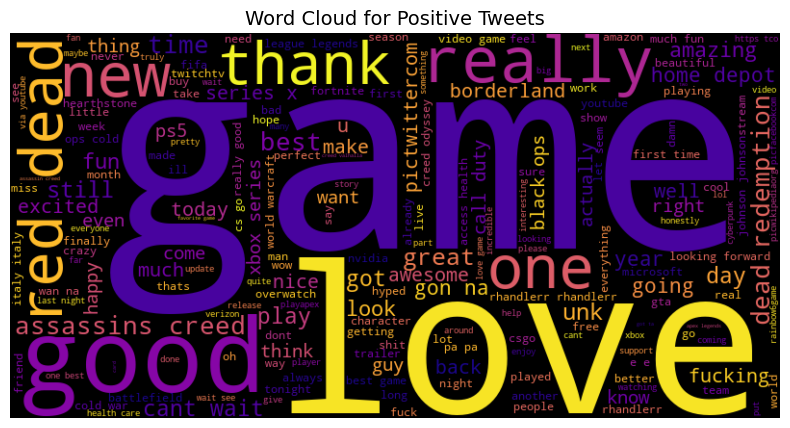

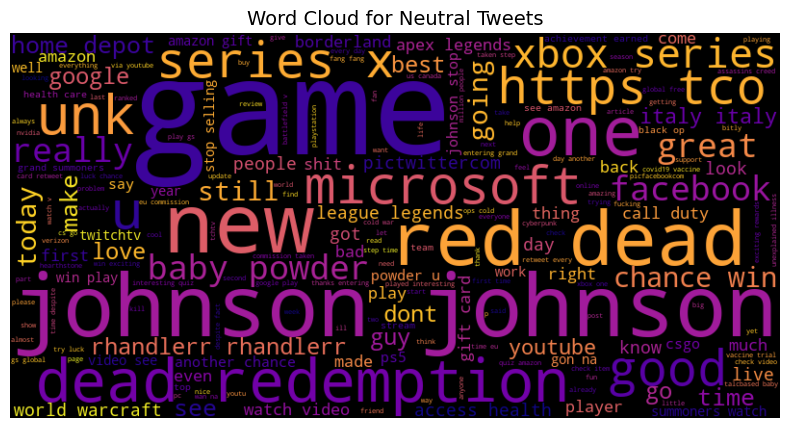

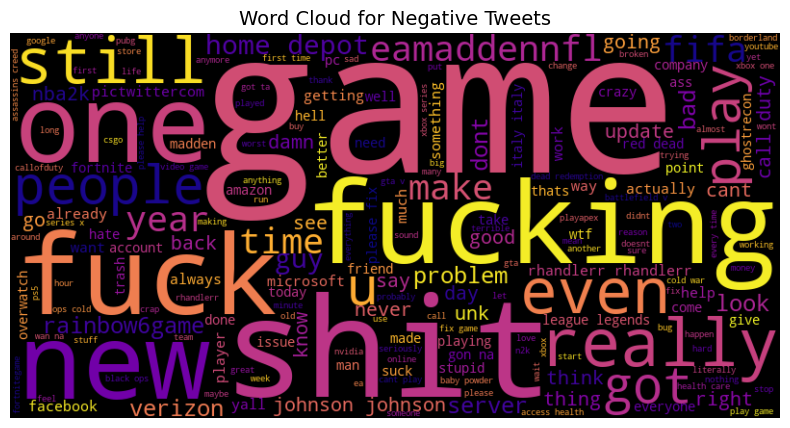

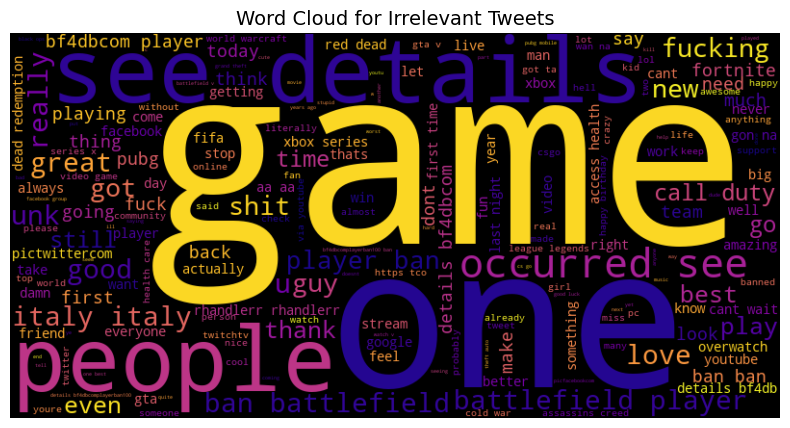

In [32]:
# Generate word clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    # Combine all cleaned tweets for that sentiment
    sentiment_text = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_Tweet'].dropna())

    # Generate the word cloud
    generate_wordcloud(sentiment_text, sentiment)

__________
# Brand-Specific Sentiment Analysis
____________

## Analyze Sentiment for specific brands
____________

In [33]:
df['Topic'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [34]:
brands = ['PUBG', 'Facebook', 'apple', 'Amazon']

In [35]:
# Create a dictionary to store filtered data
brand_dfs = {}

# Filter tweets containing each brand name (case-insensitive)
for brand in brands:
    brand_dfs[brand] = df[df['Cleaned_Tweet'].str.contains(brand, case=False, na=False)]

__________
### 1. Sentiment Counts for Each Brand
________

In [36]:
for brand in brands:
    print(f"\nSentiment Counts for {brand}:")
    print(brand_dfs[brand]['Sentiment'].value_counts())


Sentiment Counts for PUBG:
Sentiment
Negative      482
Irrelevant    432
Positive      286
Neutral       198
Name: count, dtype: int64

Sentiment Counts for Facebook:
Sentiment
Neutral       879
Negative      654
Irrelevant    432
Positive      209
Name: count, dtype: int64

Sentiment Counts for apple:
Sentiment
Neutral       144
Negative       83
Positive       31
Irrelevant     30
Name: count, dtype: int64

Sentiment Counts for Amazon:
Sentiment
Neutral       1105
Negative       469
Positive       268
Irrelevant      75
Name: count, dtype: int64


_______
### 2. Bar Plot for Each Brand
________

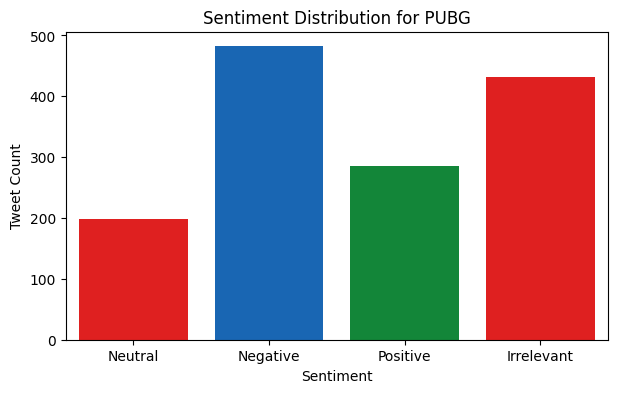

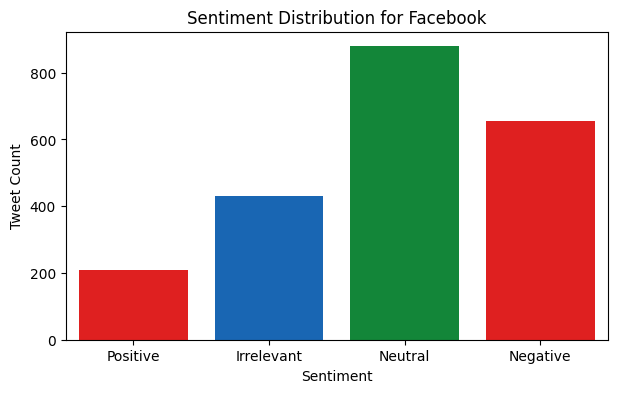

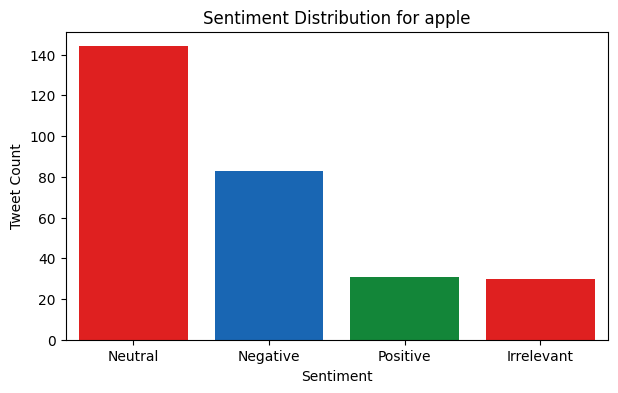

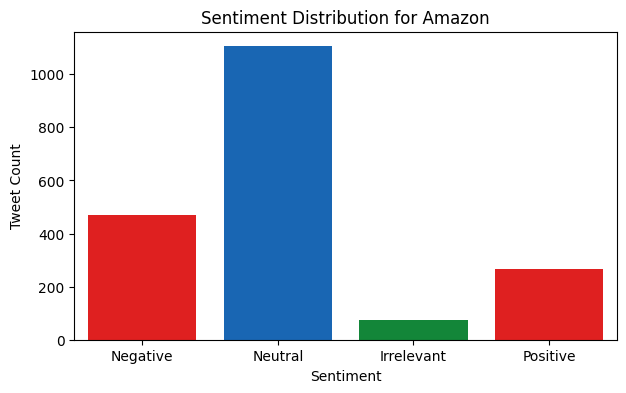

In [37]:
custom_palette = ['#FF0000', '#0066CC', '#009933']  

for brand in brands:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=brand_dfs[brand], x='Sentiment', palette=custom_palette)
    plt.title(f'Sentiment Distribution for {brand}')
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Count')
    plt.show()

_______
### 3. Word Cloud for Each Brand
_________

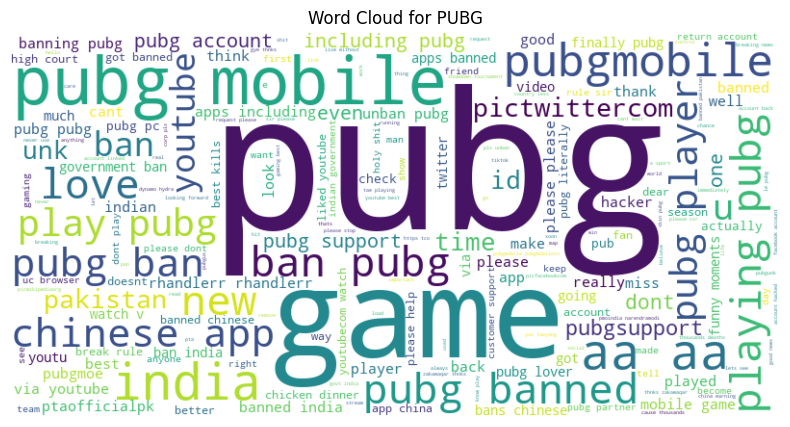

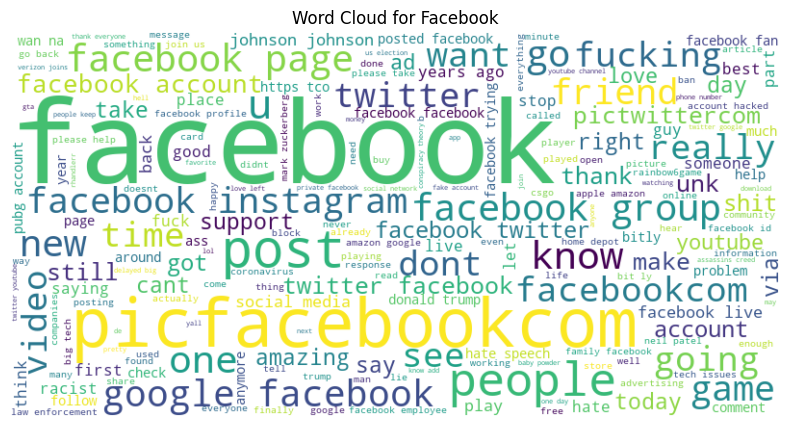

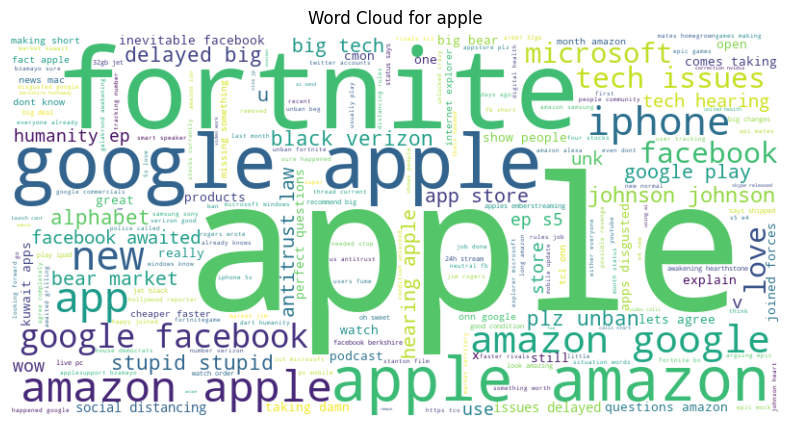

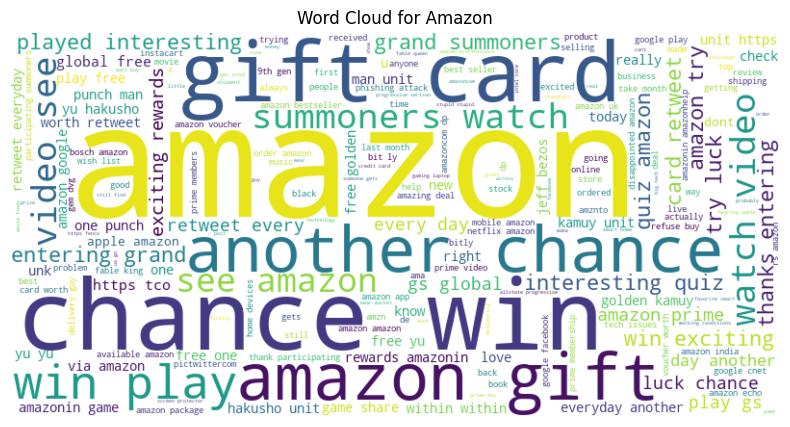

In [38]:
for brand in brands:
    # Join all cleaned tweets mentioning the brand
    text = " ".join(brand_dfs[brand]['Cleaned_Tweet'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {brand}')
    plt.show()

_________
 ## Summary Table Across Brands
 ___________

In [39]:
summary = df[df['Cleaned_Tweet'].str.contains('|'.join(brands), case=False, na=False)]
summary_table = summary.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
summary_table

Sentiment,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,62,431,967,236
ApexLegends,0,2,16,10
AssassinsCreed,6,1,0,12
Battlefield,5,0,7,9
Borderlands,2,0,1,7
CS-GO,6,1,25,5
CallOfDuty,16,1,7,7
Cyberpunk2077,6,1,14,8
Dota2,0,0,8,1


____________
# **Conclusion (Summary):**
__________
This analysis explored public sentiment on social media across several brands and topics. After cleaning and preparing the text data, we visualized sentiment distributions and word usage patterns.
______________

## Key insights:

* Sentiment varied by brand, with some brands receiving mostly positive feedback while others had mixed or neutral reactions.

* Word clouds highlighted key discussion points in positive, negative, and neutral tweets.

* Brand-specific analysis helped uncover public perception for each brand.

These findings can help brands monitor public opinion and improve their engagement strategies.
____________